**1. (i) 출력될 벡터와 행렬을 순서대로  쓰시오.**

말뭉치를 전처리를 하면 [0,1,2,3,4,5,0,1,2,3,6,7,8]이 됩니다.  
target은 크기가 1인 윈도우의 중심이므로 [0,1,2,3,4,5,0,1,2,3,6,7,8]에서 맨 왼쪽과 맨 오른쪽 하나씩 없애면 얻을수 있습니다.  
target을 움직여 가면서 양 옆의 단어를 모으면 contexts가 됩니다.

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch 2') # 각자의 경로로 수정해주세요.
import numpy as np
from common.util import preprocess

text = 'The sky is very blue and the sky is very beautiful today.'

corpus, word_to_id, id_to_word = preprocess(text)
window_size=1
target = corpus[window_size:-window_size]
contexts = []

for idx in range(window_size, len(corpus)-window_size):
    cs = []
    for t in range(-window_size, window_size + 1):
        if t == 0:
            continue
        cs.append(corpus[idx + t])
    contexts.append(cs)

print(np.array(target))
print(np.array(contexts))

[1 2 3 4 5 0 1 2 3 6 7]
[[0 2]
 [1 3]
 [2 4]
 [3 5]
 [4 0]
 [5 1]
 [0 2]
 [1 3]
 [2 6]
 [3 7]
 [6 8]]


**(ii) window_size=2로 바꾸고 출력될 벡터와 행렬을 순서대로 쓰시오.**

target은 크기가 2인 윈도우의 중심이므로 [0,1,2,3,4,5,0,1,2,3,6,7,8]에서 맨 왼쪽 둘과 맨 오른쪽 둘을 없애면 얻을수 있습니다.  
taget을 움직여 가면서 왼쪽 두 단어와 오른쪽 두 단어를 모으면 context가 됩니다.

In [2]:
window_size=2
target = corpus[window_size:-window_size]
contexts = []

for idx in range(window_size, len(corpus)-window_size):
    cs = []
    for t in range(-window_size, window_size + 1):
        if t == 0:
            continue
        cs.append(corpus[idx + t])
    contexts.append(cs)

print(np.array(target))
print(np.array(contexts))

[2 3 4 5 0 1 2 3 6]
[[0 1 3 4]
 [1 2 4 5]
 [2 3 5 0]
 [3 4 0 1]
 [4 5 1 2]
 [5 0 2 3]
 [0 1 3 6]
 [1 2 6 7]
 [2 3 7 8]]


**2.(i) 입력층 가중치 행렬 $W_{\rm in}$과 출력층 가중치 행렬 $W_{\rm out}$이
$$
W_{\rm in} =
\begin{pmatrix}
1&2&3\\
2&3&4\\
3&4&5\\
4&5&6\\
5&6&7\\
6&7&8\\
7&8&9
\end{pmatrix},
\qquad
W_{\rm out} =
\begin{pmatrix}
0&-{1 \over 2}\log2&-\log2&2\log2&2\log2&2\log2&2\log2\\
-\log 2&-{1 \over 3}\log2&\log2&0&0&0&0\\
\log 2&\log2&0&-\log2&-\log2&-\log2&-\log2\\
\end{pmatrix}
$$
와 같이 주어져 있는  simple CBOW 모델을 생각하자. 첫번째 맥락(context)인 (you, goodbye)를 입력했을때 출력되는 손실함수 값을 구하시오.**
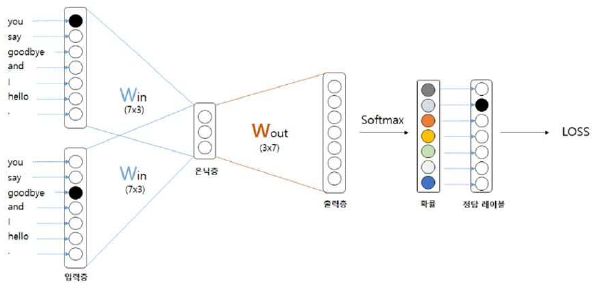

you와 goodbye를 각각 첫번째 행렬곱층에 통과시키면
$$
\begin{pmatrix} 1&0&0&0&0&0&0 \end{pmatrix} \begin{pmatrix}
1&2&3\\
2&3&4\\
3&4&5\\
4&5&6\\
5&6&7\\
6&7&8\\
7&8&9
\end{pmatrix}
=
\begin{pmatrix}1&2&3\end{pmatrix}
,\qquad
\begin{pmatrix} 0&0&1&0&0&0&0 \end{pmatrix} \begin{pmatrix}
1&2&3\\
2&3&4\\
3&4&5\\
4&5&6\\
5&6&7\\
6&7&8\\
7&8&9
\end{pmatrix}
=
\begin{pmatrix}3&4&5\end{pmatrix}
$$
이 나옵니다.  
은닉층에서는 이 둘을 평균하여
$$
{1 \over 2}\left((1,2,3)+(3,4,5)\right) = (2,3,4)
$$
을 만들어냅니다.  
두번째 행렬곱층을 통과시키면
$$
\begin{pmatrix}2&3&4\end{pmatrix}
\begin{pmatrix}
0&-{1 \over 2}\log2&-\log2&2\log2&2\log2&2\log2&2\log2\\
-\log 2&-{1 \over 3}\log2&\log2&0&0&0&0\\
\log 2&\log2&0&-\log2&-\log2&-\log2&-\log2\\
\end{pmatrix}
=
\begin{pmatrix}
\log2&2\log2&\log2&0&0&0&0
\end{pmatrix}
$$
입니다.  
softmax변환을 위해 먼저 $e^x$을 취하면
$$
(2,4,2,1,1,1,1)
$$
이고 노멀라이즈를 하면 확률벡터
$$
({1 \over 6},{1 \over 3},{1 \over 6},{1 \over 12},{1 \over 12},{1 \over 12},{1 \over 12})
$$
를 얻습니다.  
라벨은 say=[0,1,0,0,0,0,0]이므로 크로스 엔트로피값은
$$
-\log{1 \over 3} = \log 3
$$
입니다.

**(ii) cbow_predict.py를 수정하여 검산하시오. (simple_cbow.py 참고)**

In [3]:
from common.layers import MatMul, SoftmaxWithLoss

c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])
target = np.array([[0, 1, 0, 0, 0, 0, 0]])

W_in = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6],[5,6,7],[6,7,8],[7,8,9]])
W_out = np.array([[0,-np.log(2)/2,-np.log(2),2*np.log(2),2*np.log(2),2*np.log(2),2*np.log(2)],
                   [-np.log(2),-np.log(2)/3,np.log(2),0,0,0,0],
                   [np.log(2),np.log(2),0,-np.log(2),-np.log(2),-np.log(2),-np.log(2)]])

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)
loss_layer = SoftmaxWithLoss()

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

loss=loss_layer.forward(s,target)

print(loss)

1.0986119886681547


위에서 손으로 계산한 $\log 3$의 값을 출력해보면 일치하네요.

In [4]:
print(np.log(3))

1.0986122886681098


**3.(i) 입력층 가중치 행렬 $W_{\rm in}$과 출력층 가중치 행렬 $W_{\rm out}$이 2번 문제와 같이 주어진  simple skip-gram 모델을 생각하자. 첫번째 타겟(target)인 say를 입력했을때 출력되는 손실함수 값을 구하시오.**
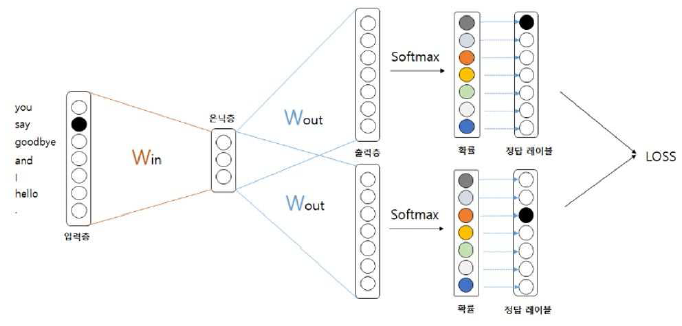

say를 첫번째 행렬곱층에 통과시키면
$$
\begin{pmatrix} 0&1&0&0&0&0&0 \end{pmatrix} \begin{pmatrix}
1&2&3\\
2&3&4\\
3&4&5\\
4&5&6\\
5&6&7\\
6&7&8\\
7&8&9
\end{pmatrix}
=
\begin{pmatrix}2&3&4\end{pmatrix}
$$
이 나옵니다.  
은닉층에 하나만 들어오기 때문에 평균할 필요는 없습니다.  
두번째 행렬곱층을 통과시키면
$$
\begin{pmatrix}2&3&4\end{pmatrix}
\begin{pmatrix}
0&-{1 \over 2}\log2&-\log2&2\log2&2\log2&2\log2&2\log2\\
-\log 2&-{1 \over 3}\log2&\log2&0&0&0&0\\
\log 2&\log2&0&-\log2&-\log2&-\log2&-\log2\\
\end{pmatrix}
=
\begin{pmatrix}
\log2&2\log2&\log2&0&0&0&0
\end{pmatrix}
$$
입니다.  
softmax변환을 위해 먼저 $e^x$을 취하면
$$
(2,4,2,1,1,1,1)
$$
이고 노멀라이즈를 하면 확률벡터
$$
({1 \over 6},{1 \over 3},{1 \over 6},{1 \over 12},{1 \over 12},{1 \over 12},{1 \over 12})
$$
를 얻습니다.  
라벨은 you=[1,0,0,0,0,0,0]와 goodbye=[0,0,1,0,0,0,0]이므로 각 크로스 엔트로피값을 더하면
$$
-\log{1 \over 6} -\log{1 \over 6} = 2\log 6
$$
입니다.

**(ii) cbow_predict.py를 수정하여 검산하시오. (simple_skip_gram.py 참고)**

In [5]:
from common.layers import MatMul, SoftmaxWithLoss


c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])
target = np.array([[0, 1, 0, 0, 0, 0, 0]])

W_in = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6],[5,6,7],[6,7,8],[7,8,9]])
W_out = np.array([[0,-np.log(2)/2,-np.log(2),2*np.log(2),2*np.log(2),2*np.log(2),2*np.log(2)],
                   [-np.log(2),-np.log(2)/3,np.log(2),0,0,0,0],
                   [np.log(2),np.log(2),0,-np.log(2),-np.log(2),-np.log(2),-np.log(2)]])

in_layer = MatMul(W_in)
out_layer = MatMul(W_out)
loss_layer0 = SoftmaxWithLoss()
loss_layer1 = SoftmaxWithLoss()

h = in_layer.forward(target)
s = out_layer.forward(h)
l0 = loss_layer0.forward(s, c0)
l1 = loss_layer1.forward(s, c1)
loss = l0 + l1

print(loss)

3.58351773845647


위에서 손으로 계산한 $2\log 6$의 값을 출력해보면 일치하네요.

In [6]:
print(2*np.log(6))

3.58351893845611
